## Contenido


- [Distribuciones de Probabilidad](#Distribuciones-de-Probabilidad)
    - [Distribuciones Discretas notables](#Distribuciones-Discretas-notables)
        - [Distribución de Bernoulli](#Distribución-de-Bernoulli)
        - [Distribución Binomial.](#Distribución-Binomial.)
        - [Distribución Geométrica](#Distribución-Geométrica)
        - [Distribución de Poisson](#Distribución-de-Poisson)
        - [Distribución hipergeométrica](#Distribución-hipergeométrica)
    - [Distribuciones continuas notables](#Distribuciones-continuas-notables)
        - [Distribución uniforme](#Distribución-uniforme)
        - [Distribución normal](#Distribución-normal)

        
 
 
- [Ley de los grandes Números](#Ley-de-los-grandes-Números)

                
    
- [Teorema central del límite](#Teorema-central-del-límite)
       
    
        
    


## Distribuciones de Probabilidad
### Distribuciones Discretas notables


Una vez que definimos las propiedades anteriores es hora de hablar de las distribuciones de probabilidad notables de cada tipo de variable y de empezar a trabajarlas con python, empezaremos como es natural con las variables discretas.


#### Distribución de Bernoulli



Esta es la distribución más sencilla de todas, en la que tenemos un experimento que solo tiene dos posibles resultados, éxito o fracaso, y vamos a suponer que la probabilidad de éxito $P(E) = p$ y la probabilidad de fracaso es $P(F) = 1 - p = q$, la variable aleatoria que describe este suceso es $X$ talque $X(E) = 1$ y $X(F) = 0$. Bajo estas características diremos que $X$ sigue una distribución de Bernoulli con parámetro $p$, y lo denotaremos como:

$$X \sim Ber(p)$$


A este tipo de experimento se le conoce como experimento de Bernoulli (Jacob), En este caso el valor esperado es simplemente $E(X) = p$ y la varianza es $var(X) = pq$.

[Regresar al contenido](#Contenido)

#### Distribución Binomial.

la distribución binomial es una distribución de probabilidad discreta que cuenta el número de éxitos en una secuencia de $n$ ensayos de [Bernoulli](https://es.wikipedia.org/wiki/Ensayo_de_Bernoulli) **independientes entre sí**. En la distribución binomial el anterior experimento se repite $n$ veces, de forma independiente, y se trata de calcular la probabilidad de un determinado número de éxitos. La representaremos como:


$$X \sim B(n, p)$$



La variable aleatoria que analizamos es el número de casos _éxito_ dentro de los n ensayos, por lo que la variable $X$ toma valores en ${0, 1, 2, 3, \cdots, n}$. La función de probabilidad de la distribución binomial es:

$$P(x) = {n \choose x}p^x(1-p)^{n-x}$$

Recordando que ${n \choose x} = \frac{n!}{x!(n-x)!}$


Y la función de distribución será:

$$F_X(x) = \sum_{i = 0}^{x} P(X = i)$$


Y se tiene $E(X) = np$ y la varianza es $var(X) = npq$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [13]:
from jupyterthemes import jtplot
jtplot.style()

In [2]:
dist = stats.binom(10, 1/6)

In [3]:
dist.pmf(5)

0.013023810204237159

In [4]:
dist.pmf(1)

0.32301116577969136

In [5]:
dist.rvs(15)

array([1, 4, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 3, 1], dtype=int64)

In [6]:
dist.mean()

1.6666666666666665

In [7]:
dist.var()

1.3888888888888888

In [8]:
10 * (1/6) * (1 - (1/6))

1.3888888888888888

In [11]:
x1, x2, x3 = np.arange(51), np.arange(51), np.arange(51)
bi1, bi2, bi3 = stats.binom(50, 1/6), stats.binom(100, 1/6), stats.binom(150, 1/6)
y1, y2, y3 = bi1.pmf(x1), bi2.pmf(x2), bi3.pmf(x3)

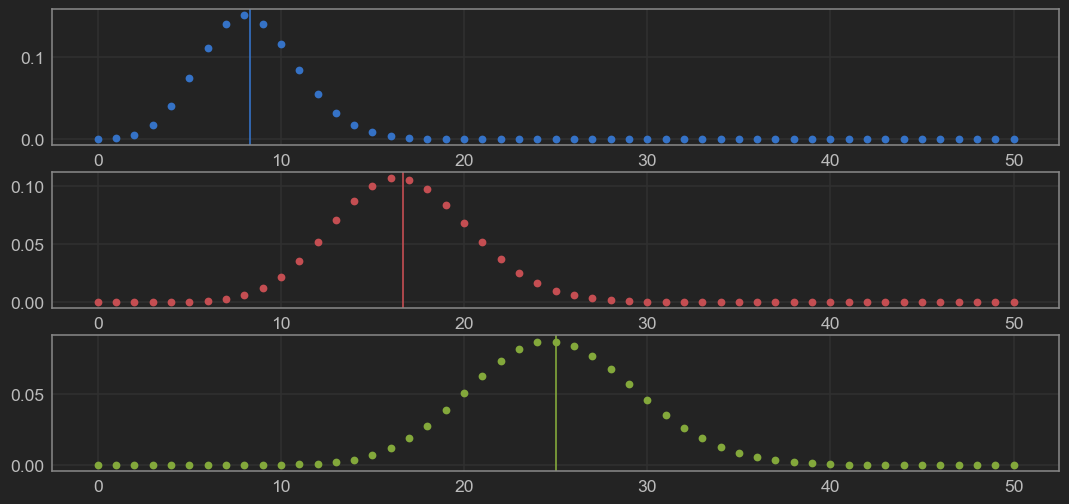

In [22]:
fig, ax = plt.subplots(3, 1, figsize = (13, 6))

ax[0].plot(x1, y1, linestyle = '', marker = 'o')
ax[0].axvline(bi1.mean())
ax[1].plot(x2, y2, linestyle = '', marker = 'o', color = 'r')
ax[1].axvline(bi2.mean(), color = 'r')
ax[2].plot(x3, y3, linestyle = '', marker = 'o', color = 'g')
ax[2].axvline(bi3.mean(), color = 'g');

Como Ejemplo supongamos que tenemos una urna con 100 bolas, 40 rojas y 60 blancas, si tomamos al azar una bola anotamos su color y lo devolvemos, llamemos al caso sacar una bola roja como el caso de éxito y repitamos el experimento 10 veces, en este caso nuestra variable aleatoria $X$ que cuente el número de veces que sacamos una bola roja seguirá una distribución $B(10, 0.4)$

In [10]:
from scipy.stats import geom
dist = geom(1/6)
valor_esperado = dist.mean()
print(valor_esperado)

6.0


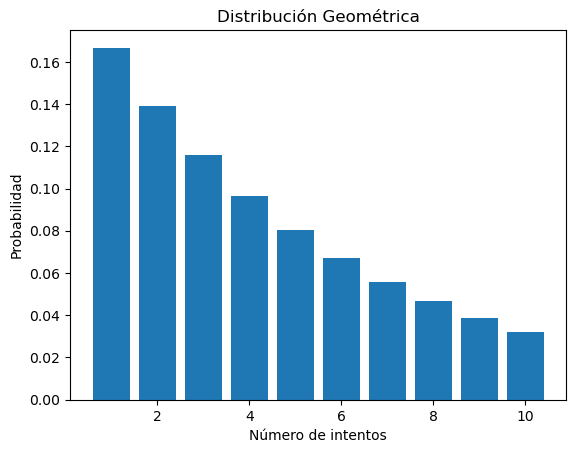

In [11]:
p = 1/6
dist = geom(p)
x = np.arange(1, 11)
pmf = dist.pmf(x)
plt.bar(x, pmf)
plt.title('Distribución Geométrica')
plt.xlabel('Número de intentos')
plt.ylabel('Probabilidad')
plt.show()

[Regresar al contenido](#Contenido)

#### Distribución Geométrica

la distribución de probabilidad del número $X$ de ensayos de Bernoulli con parámetro $p$ necesarios para obtener un éxito, la función de probabilidad de la distribución geométrica es:


$$P(X = x) = q^x p$$

Diremos entonces que $X$ sigue una distribución de probabilidad geométrica de parámetro $p$ y lo representaremos como:

$$X \sim Ge(p)$$
 
En Python la función stats.geom implementa la distribución geométrica empezando en 1

In [23]:
dist = stats.geom(1/6)

In [37]:
dist.mean()

6.0

In [29]:
dist.pmf(3)

0.11574074074074076

In [28]:
(5/6) * (5/6) * (1/6)

0.11574074074074076

In [39]:
x1, x2, x3 = np.arange(51), np.arange(120_000), np.arange(51)
bi1, bi2, bi3 = stats.geom(1/6), stats.geom(1/100_000), stats.geom(5/6)
y1, y2, y3 = bi1.pmf(x1), bi2.pmf(x2), bi3.pmf(x3)

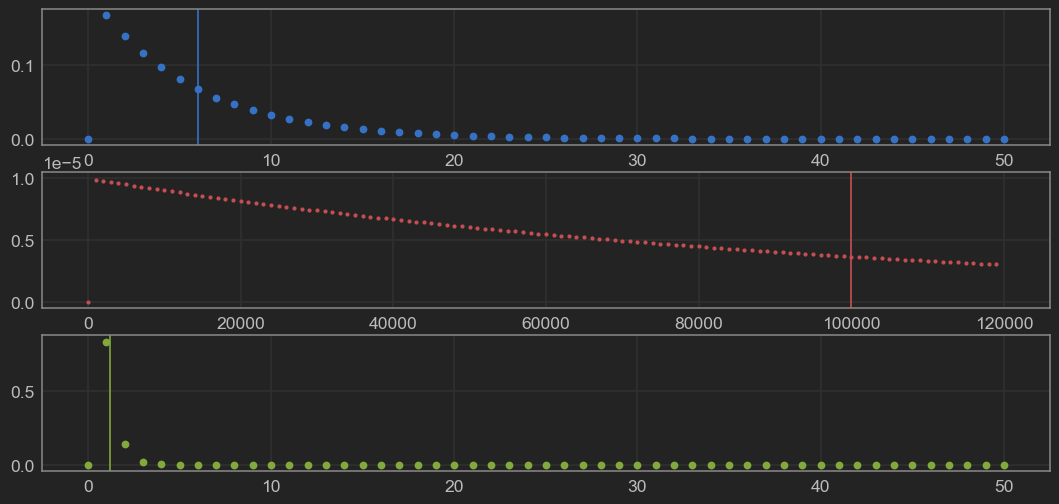

In [47]:
fig, ax = plt.subplots(3, 1, figsize = (13, 6))

ax[0].plot(x1, y1, linestyle = '', marker = 'o')
ax[0].axvline(bi1.mean())
ax[1].plot(x2, y2, linestyle = '', marker = 'o', color = 'r', markersize = 3, markevery = 1000)
ax[1].axvline(bi2.mean(), color = 'r')
ax[2].plot(x3, y3, linestyle = '', marker = 'o', color = 'g')
ax[2].axvline(bi3.mean(), color = 'g');

[Regresar al contenido](#Contenido)

#### Distribución de Poisson

La distribución de Poisson es una distribución de probabilidad discreta que se aplica a las ocurrencias de algún suceso durante un intervalo determinado. Nuestra variable aleatoria $X$ representará el _número de ocurrencias de un suceso en un intervalo determinado, el cual podrá ser tiempo, distancia, área, volumen o alguna otra unidad similar o derivada de éstas._

La variable aleatoria discreta $X$ debe cumplir ciertos requisitos:

- Debe ser un evento aleatorio
- Los sucesos que estamos estudiando deben ser **independientes**

La probabilidad de nuestra variable aleatoria X viene dada por la siguiente expresión: 

$$P(X, \lambda) = \frac{e^{-\lambda}\lambda^X}{X!}$$

- X es el número de ocurrencias del evento estudiado
- $\lambda$ es un parámetro positivo que representa el número de veces que se espera que ocurra el fenómeno durante un intervalo dado. Por ejemplo, si el suceso estudiado tiene lugar en promedio 4 veces por minuto y estamos interesados en la probabilidad de que ocurra k veces dentro de un intervalo de 10 minutos, usaremos un modelo de distribución de Poisson con $\lambda$ = 10×4 = 40.

Podemos notar que tanto el valor esperado como la varianza de una variable aleatoria con distribución de Poisson son iguales a $\lambda$. También se tiene que se cumple que $\displaystyle\sum_{x=1}^{\infty} P(X,\lambda) = 1$. Algunos ejemplos de eventos que siguen una distribución de Poisson son:

- El número de llamadas telefónicas en una central telefónica por minuto.
- El número de mutaciones de determinada cadena de ADN después de cierta cantidad de radiación.
- El número de núcleos atómicos inestables que se han desintegrado en un determinado período.
- El número de estrellas en un determinado volumen de espacio.


Si tenemos una distribución Binomial $B(n, p)$ donde $n$ sea relativamente grande y $p$ relativamente pequeño, se puede aproximas dicha binomial usando una Poisson con parámetro $\lambda = np$. No hay un criterio específico para realizar la aproximación pero se suele decir que si $n \geq 30$, $np \geq 10$ y $p \leq 0.05$ la Poisson ya es una buena aproximación de la binomial.

In [48]:
dist = stats.poisson(3)

In [49]:

dist.mean()

3.0

In [50]:
dist.var()

3.0

In [51]:
dist.pmf(8)

0.008101511794681432

In [55]:
x1, x2, x3 = np.arange(51), np.arange(51), np.arange(1200)
bi1, bi2, bi3 = stats.poisson(6), stats.poisson(15), stats.poisson(1000)
y1, y2, y3 = bi1.pmf(x1), bi2.pmf(x2), bi3.pmf(x3)

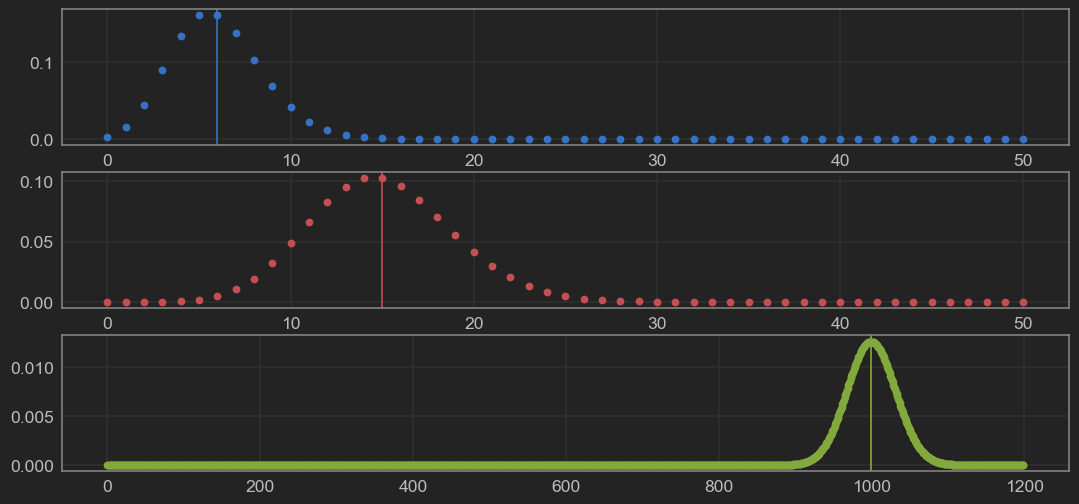

In [56]:
fig, ax = plt.subplots(3, 1, figsize = (13, 6))

ax[0].plot(x1, y1, linestyle = '', marker = 'o')
ax[0].axvline(bi1.mean())
ax[1].plot(x2, y2, linestyle = '', marker = 'o', color = 'r')
ax[1].axvline(bi2.mean(), color = 'r')
ax[2].plot(x3, y3, linestyle = '', marker = 'o', color = 'g')
ax[2].axvline(bi3.mean(), color = 'g');

__Ejemplo__


Durante la segunda guerra mundial, Alemania bombardeaba Inglaterra desde Calaes (Francia) utilizando los cohetes V1 y V2, siendo estos el primer misil guiado que se utilizó en la guerra  y el primer misil balístico de combate. Con la finalidad de descubrir si los Nazis podían elegir los objetivos de dichos ataques o estaban atacando a ciegas se dividió el sur de Londres en 576 regiones con la misma extensión de $0.25 km^2$, a lo largo de la contienda impactaron en esas regiones un total de 535 bombas V1 y V2.

- Si se selecciona una región al azar, ¿cuál es la probabilidad de que fuese blanco de las bombas en dos ocasiones?
- ¿Cuál es la probabilidad de que la región no recibiera ningún impacto?
- según lo anterior, cuantas de las 576 regiones se espera que reciban 2 impactos, y cuantas ninguno?


In [58]:
l = 535 / 576

In [59]:
dist = stats.poisson(l)

In [60]:
dist.pmf(2)

0.17039287947064016

In [61]:
dist.pmf(0)

0.39501977800158

In [62]:
dist.pmf(2) * 576

98.14629857508874

In [63]:
dist.pmf(0) * 576

227.53139212891008

Según el análisis teórico si los bombardeos, se espera que alrededor de 98 regiones sean bombardeadas 2 veces, y que alrededor de 228 no sean bombardeadas. Los datos reales fueron que 93 regiones fueron bombardeadas 2 veces y 229 no fueron bombardeadas, por lo que se llega a a conclusión de que los alemanes no apuntaban los misiles, estaban atacando al azar.


[Regresar al contenido](#Contenido)

#### Distribución hipergeométrica


La distribución hipergeométrica es una distribución discreta relacionada con muestreos aleatorios y sin reemplazo. Suponga que se tiene una población de $N$ elementos de los cuales, $d$ pertenecen a la categoría $A$ y $N-d$ a la $B$. La distribución hipergeométrica mide la probabilidad de obtener $x$ ($ 0\leq x\leq d$) elementos de la categoría A en una muestra sin reemplazo de n elementos de la población original.

Las características de una distribución hipergeómetrica son:

- La población debe tener un número finito de elementos $N$.
- se toma una muestra aleatoria de $n$ elementos de la población
- Existen $d$ elementos con una característica deseada en la población.
- En la muestra $n$ hay $x$ elementos con la caractarística deseada


La función de probabilidad de una variable aleatoria con distribución hipergeométrica es igual a:

$$P(X=x)=\frac {\binom{d}{x}  \binom{N-d}{n-x}}{N \choose n}$$

Donde $\displaystyle N$ es el tamaño de población, $n$ es el tamaño de la muestra extraída, $d$ es el número de elementos en la población original que pertenecen a la categoría deseada y $x$ es el número de elementos en la muestra que pertenecen a dicha categoría. La notación $\displaystyle {a \choose x}$ al número de combinaciones posibles al seleccionar $x$ elementos de un total $a$.

El valor esperado de una variable aleatoria $X$ (media) que sigue una distribución hipergeométrica es:

$$\displaystyle E[X]={\frac {nd}{N}}$$

y su varianza:

$$Var[X]=\bigg (\frac{N-n}{N-1}\bigg )\bigg (\frac {nd}{N}\bigg )\bigg (1-\frac{d}{N}\bigg )$$
En la fórmula anterior, definiendo

$$p=\frac {d}{N}$$
y

$$q=1-p$$
se obtiene

$$Var[X]=npq\frac{N-n}{N-1}$$
$$E[X]= np$$
La distribución hipergeométrica es aplicable a muestreos sin reemplazo y la binomial a muestreos con reemplazo. 

__Ejemplo__

Se reparten 5 cartas de una baraja de 52, ¿cuál es la probabilidad de obtener un poker de aces (4 aces) si se sabe que al menos ya salieron 3?

Se quiere calcular la probabilidad $P(x = 4 | x \ge 3)$, por teorema de bayes sabemos que:


$$P(x = 4 | x \ge 3) = \frac{P(x = 4)P(x \ge 3 | x = 4)}{P(x \ge 3)}$$

notando que $P(x \ge 3 | x = 4)$ = 1 el problema se reduce a calcular:
$$P(x = 4 | x \ge 3) = \frac{P(x = 4)}{P(x \ge 3)}$$


Y $P(x \ge 3) = P(x = 4) + P(x = 3)$

In [64]:
N, d, n = 52, 4, 5

In [65]:
dist = stats.hypergeom(N, d, n)

In [66]:
dist.pmf(4)

1.846892603195124e-05

In [67]:
dist.pmf(4) + dist.pmf(3)

0.001754547973035368

In [69]:
dist.pmf(4) / (dist.pmf(4) + dist.pmf(3))

0.010526315789473684

[Regresar al contenido](#Contenido)

### Distribuciones continuas notables


#### Distribución uniforme

Una variable aleatoria $X$ tiene distribución uniforme sobre un intervalo real $(a, b)$, si su función de densidad es:


$$f(X) = \frac{1}{b - a}$$

para $x \in (a, b)$, si $X$ sigue una distribución uniforme lo denotaremos por $X \sim U(a, b)$. Noten que el valor esperado de esta distribución es $E(x) = \frac{a + b}{2}$ y su varianza $var(x) = \frac{(b - a)^2}{12}$ 


Dentro de Python la función uniform nos permite generar distribuciones uniformes pero utilizando los parámetros _loc_ y _scale_ que seran $loc = a$, y $scale = b - a$

In [71]:
np.random.random(15)

array([0.39627004, 0.70327914, 0.87084346, 0.9489165 , 0.72000465,
       0.75937864, 0.08864229, 0.70399983, 0.72158885, 0.7171762 ,
       0.76045952, 0.41561373, 0.91322941, 0.94334005, 0.5292732 ])

In [74]:
x = np.random.randn(100_000)

In [75]:
stats.mode(x)

C:\Users\juan.enriquez\AppData\Local\Temp\ipykernel_5168\1654510724.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(x)


ModeResult(mode=array([-4.62912887]), count=array([1]))

In [83]:
dist = stats.uniform(-2, 4) # (donde empezas, y cual es el ancho de tu escalon)

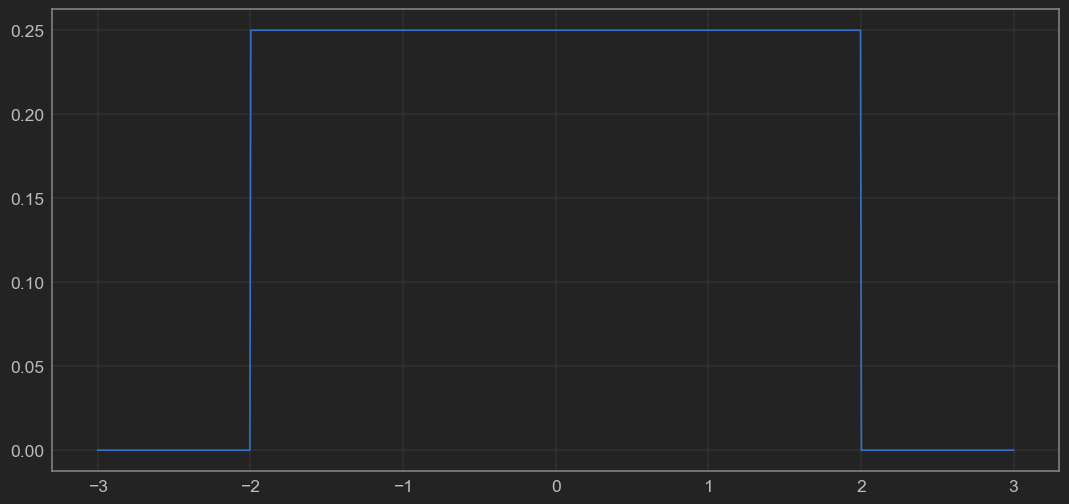

In [84]:
fig, ax = plt.subplots(figsize = (13, 6))

x = np.linspace(-3, 3, 1000)
ax.plot(x, dist.pdf(x));

[Regresar al contenido](#Contenido)

<hr>
<h4>Distribución normal</h4>


La distribución normal o distribución gaussiana es una de las distribuciones de probabilidad de variable continua que con más frecuencia aparece en estadística y en la teoría de probabilidades. La función distribución de probabilidad está dada por:

$$f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2} \big(\frac{x - \mu}{\sigma}\big)^2}$$

Donde $\mu$ es la media y $\sigma$ es la desviación estándar. La distribución de probabilidad _normal estandar_ es aquella que tiene por media $0$ y por desviación estándar $1$. Al ser una distribución de probabilidad el área bajo la curba que resulta de graficar $f$ es igual a $1$ y podemos asociar la integral $\displaystyle\int_{-\infty}^{a} f(x)\, dx$ con el valor de la probabilidad de que la variable $x$ tome un valor menor o igual a $a$.

$$e^{-x^2}$$

In [85]:
dist = stats.norm(1.68, 0.15)

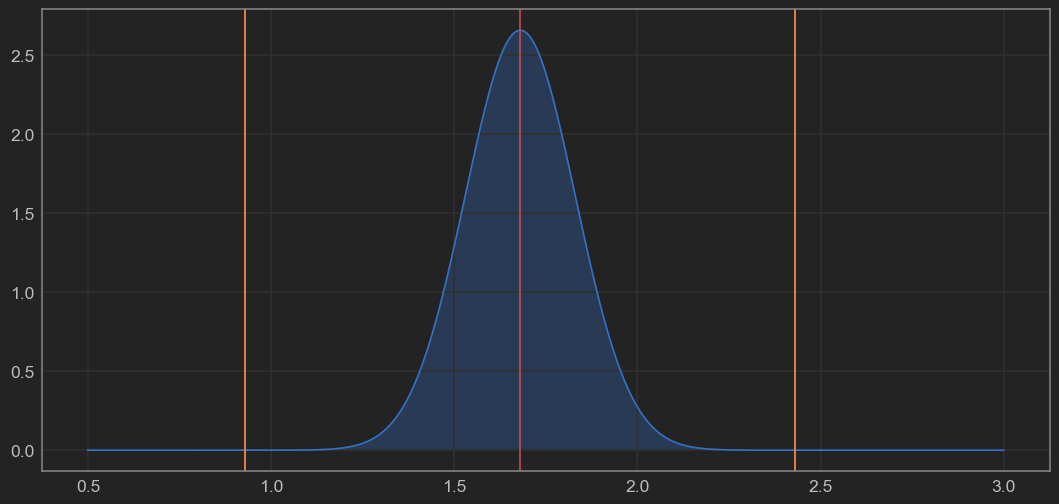

In [113]:
fig, ax = plt.subplots(figsize = (13, 6))

x = np.linspace(0.5, 3, 1000)
ax.plot(x, dist.pdf(x))
ax.axvline(dist.mean(), color = 'r')
n = 5
interval = (((dist.mean() - n * dist.std()) <= x) & (x <= (dist.mean() + n * dist.std())))
ax.axvline(dist.mean() - n * dist.std(), color = 'y')
ax.axvline(dist.mean() + n * dist.std(), color = 'y')
ax.fill_between(x, dist.pdf(x), where = interval, alpha = 0.3);

In [114]:
dist.cdf(dist.mean() + n * dist.std()) - dist.cdf(dist.mean() - n * dist.std())

0.9999994266968562

In [115]:
1 - (dist.cdf(dist.mean() + n * dist.std()) - dist.cdf(dist.mean() - n * dist.std()))

5.733031438470704e-07

In [120]:
1 / 7_000_000

1.4285714285714285e-07

Si $X \sim N(\mu, \sigma)$ entonces $\frac{X - \mu}{\sigma} \sim N(0, 1)$

In [122]:
dist = stats.norm(0, 1)

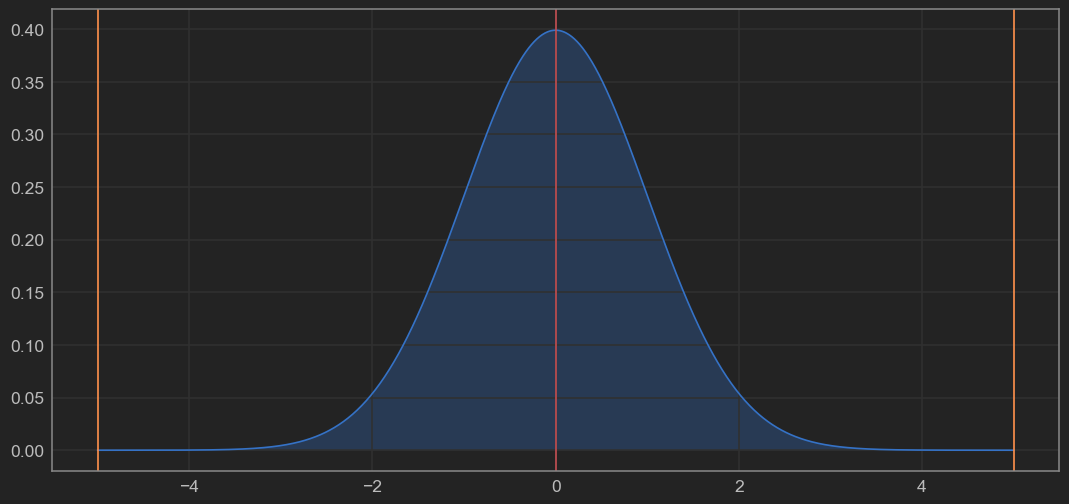

In [123]:
fig, ax = plt.subplots(figsize = (13, 6))

x = np.linspace(-5, 5, 1000)
ax.plot(x, dist.pdf(x))
ax.axvline(dist.mean(), color = 'r')
n = 5
interval = (((dist.mean() - n * dist.std()) <= x) & (x <= (dist.mean() + n * dist.std())))
ax.axvline(dist.mean() - n * dist.std(), color = 'y')
ax.axvline(dist.mean() + n * dist.std(), color = 'y')
ax.fill_between(x, dist.pdf(x), where = interval, alpha = 0.3);

[Regresar al contenido](#Contenido)

## Ley de los grandes Números


A medida que aumenta el número de repeticiones de un experimento, el promedio de las medias muestrales se aproxima mejor a la media de la población.

$$\frac{1}{n} \sum \bar{x}_i \to \mu$$
$$\bar{X_n} \to \mu$$

- Cualquier muestra (o experimento) es sensible a la variabilidad del muestreo, ruido, etc.

    - Esto significa que es poco probable que una muestra o experimento proporcione una buena estimación de la media real de la población.

- Pero muestrear muchas veces puede proporcionar una medida precisa de la media real de la población.

In [124]:
probabilities = np.array([1/4, 1/4, 1/8, 1/8, 1/8, 1/8])

In [126]:
probabilities.sum()

1.0

In [127]:
values = np.array([1, 2, 3, 4, 5, 6])

$$E[X] = \sum x P(x)$$
$$E[X] = \vec{x} \cdot \vec{P}$$

In [143]:
E = values.dot(probabilities)
E

3.0

In [130]:
(values * (1/6)).sum()

3.5

In [138]:
s = np.random.choice(values, 10000)

In [139]:
s.mean()

3.4977

In [140]:
s = np.random.choice(values, 10000, p = probabilities)

In [141]:
s.mean()

2.9985

In [153]:
population = np.random.choice(values, 1_000_000, p = probabilities)

k = 5000
n = 5_000

sample_means = []

for i in range(n):
    sample = np.random.choice(population, size = i + 1)
    sample_means.append(sample.mean())

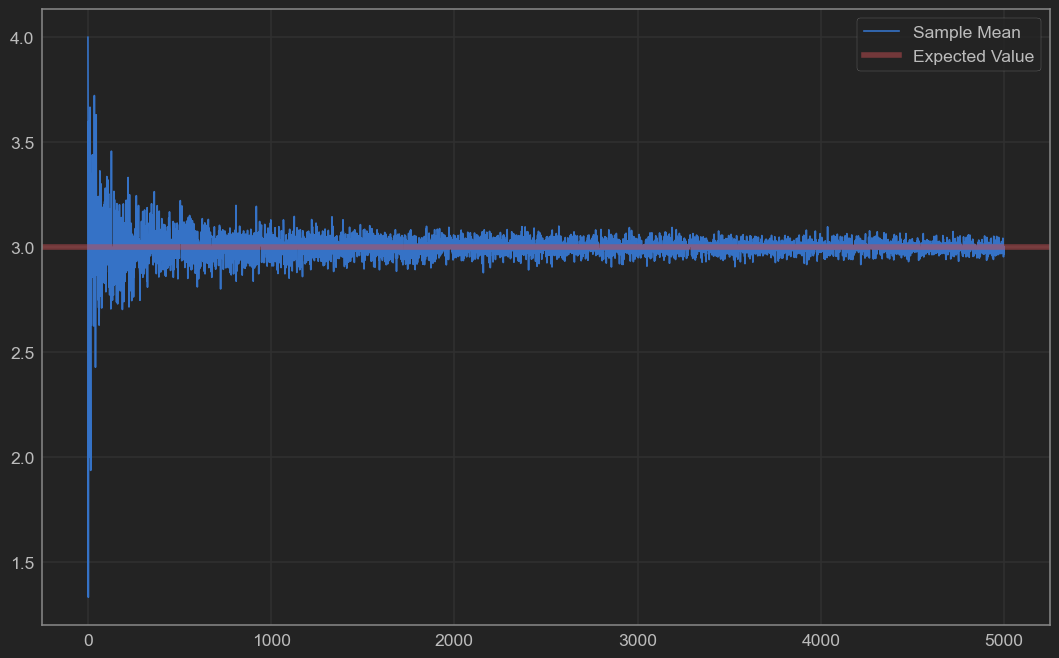

In [154]:
fig, ax = plt.subplots(figsize = (13, 8))


ax.plot(sample_means, label = 'Sample Mean')
ax.axhline(E, linewidth = 4, color = 'r', alpha = 0.5, label = 'Expected Value')
ax.legend();

In [173]:
dist = stats.norm(1.68, 0.15)
population = dist.rvs(120_000_000)

sample_size  = 20
number_exp   = 500
sample_means = []

for i in range(number_exp):
    sample = np.random.choice(population, size = sample_size)
    sample_means.append(sample.mean())
    
sample_means = np.array(sample_means)

In [174]:
sample_means.mean()

1.681570854908265

In [175]:
np.cumsum(sample_means) / np.arange(1, number_exp + 1);

In [176]:
np.arange(1, number_exp + 1);

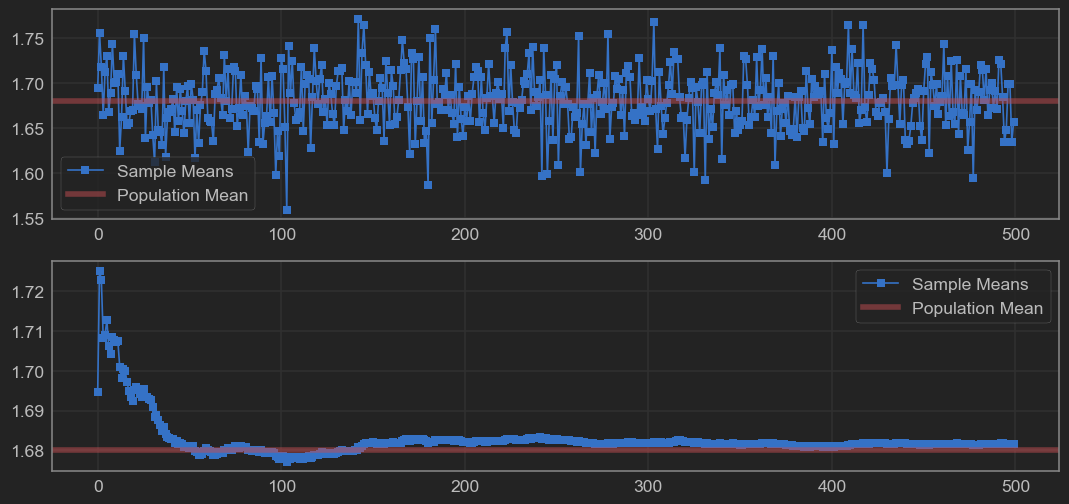

In [177]:
fig, ax = plt.subplots(2, 1, figsize = (13, 6))

ax[0].plot(sample_means, label = 'Sample Means', marker = 's')
ax[0].axhline(dist.mean(), color = 'r', linewidth = 4, alpha = 0.5, label = 'Population Mean')
ax[0].legend()


ax[1].plot(np.cumsum(sample_means) / np.arange(1, number_exp + 1), label = 'Sample Means', marker = 's')
ax[1].axhline(dist.mean(), color = 'r', linewidth = 4, alpha = 0.5, label = 'Population Mean')
ax[1].legend();

Vamos a simular la ley de los grandes números simulando el lanzamiento de un dado, en este caso particular las variables $X_n$ seguirán una distribución de Bernoulli de parámetro $p = \frac{1}{6}$ y va a contar cuantas veces obtenemos una cara en la tirada. En este caso cada una de las $X_i$ tendran el mismo valor esperado $E[X_i]= \frac{1}{6}$, y vamos a suponer que nuestro caso de exito es que el dado salga en 3, entonces $X_i$ sera 1 si el dado cayo 3 en la i-ésima tirada y 0 en otro caso, entonces:

$$\bar{X_n} = \frac{X_1 + X_2 + \cdots + X_n}{n} = \frac{\text{número de exitos}}{\text{número de tiradas}}$$

Lo mismo sucede para cada cara del dado, y entonces lo que esperamos es que entre más tiradas hagamos:

$$\bar{X_n} \to \frac{1}{6}$$

[Regresar al contenido](#Contenido)

## Teorema central del límite


La distribución de las medias muestrales se aproxima a una distribución gaussiana, independientemente de la forma de la distribución de la población.


$$Z = \frac{\bar{X_n} - \mu}{\frac{\sigma}{\sqrt{n}}} \to N(0, 1)$$

$$\bar{X_n} \sim N(\mu, \frac{\sigma}{\sqrt{n}})$$


In [178]:
population_size = 1_000_000
dist = stats.poisson(5)
population = dist.rvs(population_size) ** 2

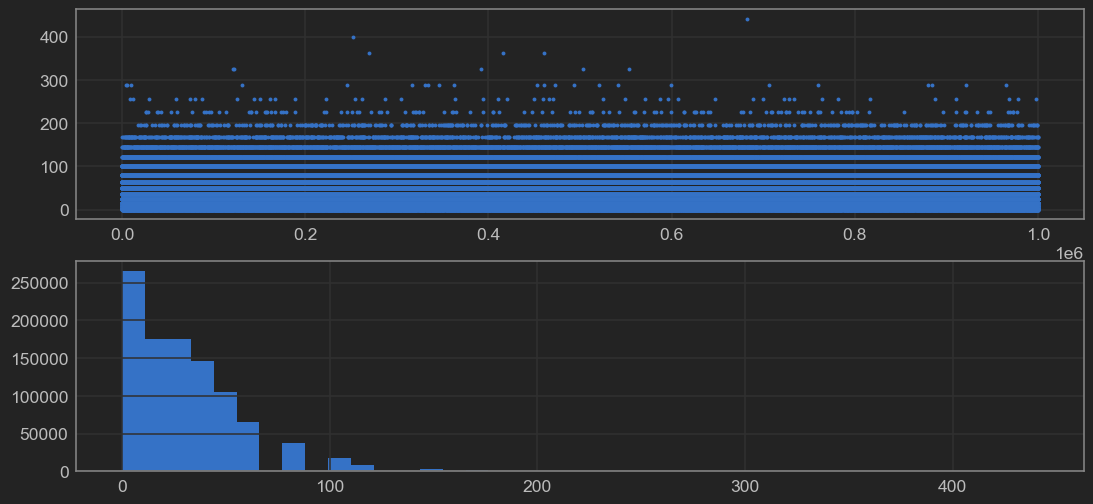

In [180]:
fig, ax = plt.subplots(2, 1, figsize = (13, 6))

ax[0].plot(population, marker = '.', linestyle = '')
ax[1].hist(population, 40);

In [181]:
import pandas as pd

In [182]:
data = pd.DataFrame({'X' : population})

In [183]:
data.head()

,X
0,36
1,25
2,36
3,36
4,16


In [186]:
data['X'].sample(15).mean()

35.4

In [202]:
sample_size = 100
number_exp  = 500

sample_means = [data['X'].sample(sample_size).mean() for i in range(number_exp)]
sample_means = np.array(sample_means)

In [203]:
len(sample_means)

500

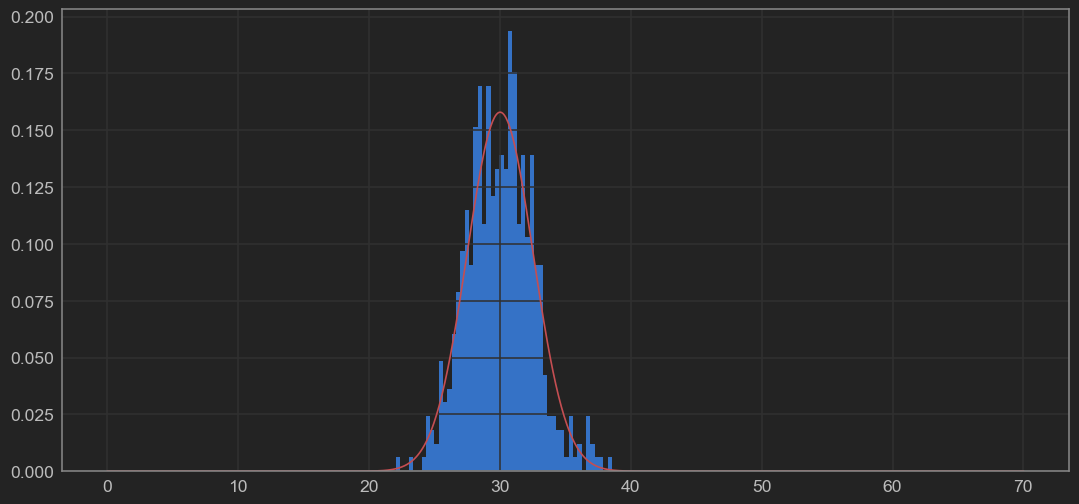

In [204]:
fig, ax = plt.subplots(figsize = (13, 6))

x = np.linspace(0, 70, 1000)
dist = stats.norm(sample_means.mean(), sample_means.std())

ax.plot(x, dist.pdf(x), color = 'r')
ax.hist(sample_means, bins = 50, density = True);

[Regresar al contenido](#Contenido)